# Sentiment classification of IMDB movie ratings

 ## Using EMBEDDINGS and LSTM

<img src="plan.png" height="500">

In [1]:
import keras.datasets.imdb as imdb
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
import matplotlib.pylab as plt

In [2]:
%%time

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

print(len(X_train), "Training sequences")
print(len(X_test), "Validation sequences")

25000 Training sequences
25000 Validation sequences
Wall time: 4.51 s


In [3]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 

In [4]:
def sequence2text(array):
    decoded = " ".join( [reverse_index.get(i-3 , "") for i in array] )
    return decoded[1:] #remove first space from join()

In [5]:
sequence2text(X_train[0])

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly  was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little  that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big  for the whole film but these children are amazing and should be  for what they have done don't you think the whole story was so lovely 

In [6]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [7]:
sequence2text(X_train[0])

"                                                                                                                                                                                                                                                                                          this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly  was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little  that played the  of norma

In [8]:
embedding_layer = Embedding(input_dim= top_words,
                            output_dim = 100,
                            input_length= max_review_length)

In [9]:
# create the model
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 100)          500000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 580,501
Trainable params: 580,501
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
%%time
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=60)

Epoch 1/10
417/417 [==============================] - 519s 1s/step - loss: 0.5886 - accuracy: 0.6821 - val_loss: 0.3567 - val_accuracy: 0.8505
Epoch 2/10
417/417 [==============================] - 562s 1s/step - loss: 0.2951 - accuracy: 0.8812 - val_loss: 0.3443 - val_accuracy: 0.8523
Epoch 3/10
417/417 [==============================] - 564s 1s/step - loss: 0.2333 - accuracy: 0.9074 - val_loss: 0.3078 - val_accuracy: 0.8730
Epoch 4/10
417/417 [==============================] - 566s 1s/step - loss: 0.2043 - accuracy: 0.9222 - val_loss: 0.3542 - val_accuracy: 0.8720
Epoch 5/10
417/417 [==============================] - 576s 1s/step - loss: 0.1797 - accuracy: 0.9297 - val_loss: 0.3408 - val_accuracy: 0.8737
Epoch 6/10
417/417 [==============================] - 575s 1s/step - loss: 0.1656 - accuracy: 0.9327 - val_loss: 0.3774 - val_accuracy: 0.8548
Epoch 7/10
417/417 [==============================] - 575s 1s/step - loss: 0.1813 - accuracy: 0.9320 - val_loss: 0.3762 - val_accuracy: 0.8695

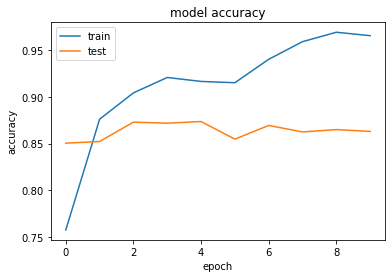

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
y_pred = model.predict(X_test)

In [13]:
k = 0
while True:
    i = np.random.randint(len(X_test))
    if k == 3 : break
    pred = np.round(y_pred[i][0])
    true = y_test[i]
    if pred != true:
        print("Predicted :",pred, " True class : ",true, " Certainty : ", np.abs(true - y_pred[i][0]) )
        print(sequence2text(X_test[i]))
        print()
        k += 1

Predicted : 1.0  True class :  0  Certainty :  0.9828307628631592
                                                                                                                                                                                                                                                                                                                                                              this movie is a window on the world of britain in 1973 a world of holiday   and birds i was actually at while this was being filmed so it's fascinating to see where i as a kid and what a world we have left behind the  such as it is concerns stan and  attempts to turn a job at a holiday camp 25  a week into an opportunity for chasing young women and  up  they are joined by the rest of  family and some laughs are to be had from arthur michael  and anna karen  as well as the sheer  of  but the idea that young women would see anything  in stan   or  jack bob grant is just   enough 

In [14]:
from sklearn.metrics import classification_report
target_names = ['Negative','Positive']
print(classification_report(y_test, np.round(y_pred), target_names=target_names))

              precision    recall  f1-score   support

    Negative       0.85      0.89      0.87     12500
    Positive       0.88      0.84      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



## LSTM and pre-trained GLOVE embeddings

In [15]:
embeddings_index = {}
f = open('glove.6B.100d.txt','r',encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [16]:
embedding_matrix = np.zeros((len(index) + 1, 100))
for word, i in index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i+3] = embedding_vector

In [17]:
embedding_layer = Embedding(input_dim= embedding_matrix.shape[0],
                            output_dim = embedding_matrix.shape[1],
                            input_length= max_review_length,
                            weights=[embedding_matrix],
                            trainable=False)

In [18]:
# create the model
model = Sequential()
model.add(embedding_layer)
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          8858500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 8,939,001
Trainable params: 80,501
Non-trainable params: 8,858,500
_________________________________________________________________
None


In [19]:
%%time
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=60)

Epoch 1/10
417/417 [==============================] - 386s 922ms/step - loss: 0.6465 - accuracy: 0.6205 - val_loss: 0.6401 - val_accuracy: 0.6124
Epoch 2/10
417/417 [==============================] - 388s 932ms/step - loss: 0.5384 - accuracy: 0.7246 - val_loss: 0.4344 - val_accuracy: 0.8093
Epoch 3/10
417/417 [==============================] - 397s 952ms/step - loss: 0.3875 - accuracy: 0.8273 - val_loss: 0.3528 - val_accuracy: 0.8415
Epoch 4/10
417/417 [==============================] - 402s 965ms/step - loss: 0.3351 - accuracy: 0.8563 - val_loss: 0.3117 - val_accuracy: 0.8666
Epoch 5/10
417/417 [==============================] - 404s 968ms/step - loss: 0.3124 - accuracy: 0.8682 - val_loss: 0.3008 - val_accuracy: 0.8702
Epoch 6/10
417/417 [==============================] - 404s 969ms/step - loss: 0.2895 - accuracy: 0.8749 - val_loss: 0.2932 - val_accuracy: 0.8772
Epoch 7/10
417/417 [==============================] - 408s 979ms/step - loss: 0.2733 - accuracy: 0.8872 - val_loss: 0.2817 -

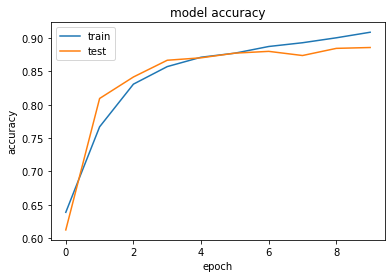

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()